# Law of Large Numbers

As the sample size goes to $\infty$, the average of a sequence of random varibles from the same distribution converges to the expected value of that distribution.

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
import matplotlib

import json
s = json.load(open('style/bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)

matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14

In [3]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## The Law of Large Numbers Illustrated

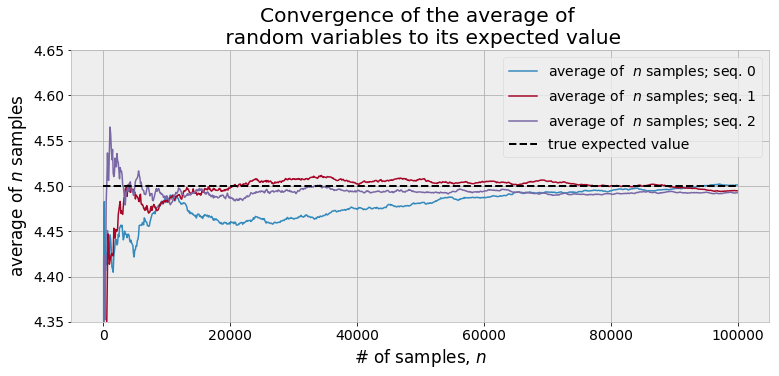

In [4]:
figsize( 12.5, 5 )

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1,sample_size,100)

for k in range(3):

    samples = poi( lambda_, sample_size ) 
    
    partial_average = [ samples[:i].mean() for i in N_samples ]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="average \
of  $n$ samples; seq. %d"%k)
    

plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "true expected value", c = "k" )

plt.ylim( 4.35, 4.65) 
plt.title( "Convergence of the average of \n random variables to its \
expected value" )
plt.ylabel( "average of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

## Convergence tp the Expected Value

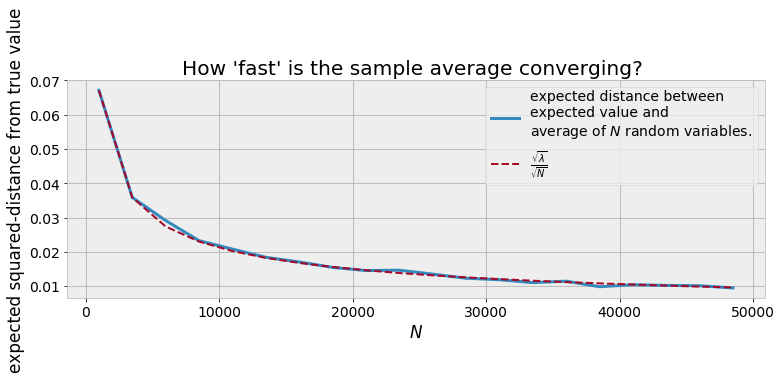

In [5]:
figsize( 12.5, 4)

N_Y = 250 #use this many to approximate D(N)
N_array = np.arange( 1000, 50000, 2500 ) #use this many samples in the approx. to the variance.
D_N_results = np.zeros( len( N_array ) )

lambda_ = 4.5 
expected_value = lambda_ #for X ~ Poi(lambda) , E[ X ] = lambda

def D_N( n ):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi( lambda_, (n, N_Y) )
    average_Z = Z.mean(axis=0)
    return np.sqrt( (  (average_Z - expected_value)**2  ).mean() )
    
    
for i,n in enumerate(N_array):
    D_N_results[i] =  D_N(n)


plt.xlabel( "$N$" )
plt.ylabel( "expected squared-distance from true value" )
plt.plot(N_array, D_N_results, lw = 3, 
            label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.plot( N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw = 2, ls = "--", 
        label = r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$" )
plt.legend()
plt.title( "How 'fast' is the sample average converging? " );

The rate of convergence to $E[Z]$ is 

$$\frac{\sqrt{Var(Z)}}{\sqrt{N}}$$

A larger N is usually fine because computational power can be had for cheap.

The Law of Large Numbers allows us to compute point estimates for parameters. We also need to understand the situations in which we can and cannot use the Law of Large Numbers. 

### The Law of Large Numbers only Holds for Many Samples

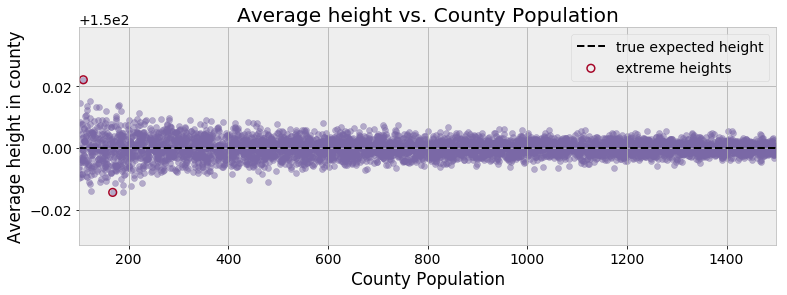

In [6]:
figsize( 12.5, 4) 
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = np.random.randint
norm = np.random.normal

#generate some artificial population numbers
population = pop_generator(100, 1500, n_counties )

average_across_county = np.zeros( n_counties )
for i in range( n_counties ):
    #generate some individuals and take the mean
    average_across_county[i] = norm(mean_height, 1./std_height,
                                        population[i] ).mean()
    
#located the counties with the apparently most extreme average heights.
i_min = np.argmin( average_across_county )
i_max = np.argmax( average_across_county )

#plot population size vs. recorded average
plt.scatter( population, average_across_county, alpha = 0.5, c="#7A68A6")
plt.scatter( [ population[i_min], population[i_max] ], 
           [average_across_county[i_min], average_across_county[i_max] ],
           s = 60, marker = "o", facecolors = "none",
           edgecolors = "#A60628", linewidths = 1.5, 
            label="extreme heights")

plt.xlim( 100, 1500 )
plt.title( "Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot( [100, 1500], [150, 150], color = "k", label = "true expected \
height", ls="--" )
plt.legend(scatterpoints = 1);

Extreme average heights occur in the smallest counties because there is more variation.

In [12]:
std_county = np.zeros(n_counties)
for i in range( n_counties ):
    #generate some individuals and take the mean
    std_county[i] = norm(mean_height, 1./std_height,
                                        population[i] ).std()

Text(0.5,1,'Standard Deviation in Height vs. County Population')

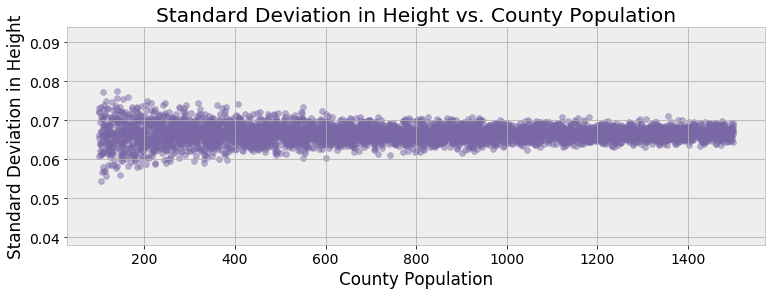

In [15]:
plt.scatter(population, std_county, alpha = 0.5, color = "#7A68A6")
plt.xlabel('County Population'); plt.ylabel('Standard Deviation in Height');
plt.title('Standard Deviation in Height vs. County Population');

In [16]:
print("Population sizes of 10 'shortest' counties: ")
print(population[ np.argsort( average_across_county )[:10] ], '\n')
print("Population sizes of 10 'tallest' counties: ")
print(population[ np.argsort( -average_across_county )[:10] ])

Population sizes of 10 'shortest' counties: 
[168 189 124 205 189 123 226 172 480 143] 

Population sizes of 10 'tallest' counties: 
[109 123 102 180 178 117 140 135 117 184]


Shortest and tallest counties both are small (in population) counties. 

Another example that extreme values come from small samples sizes.

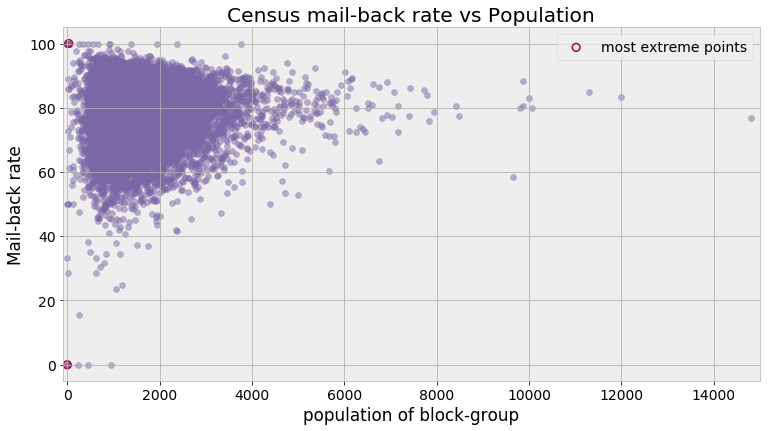

In [17]:
figsize( 12.5, 6.5 )
data = np.genfromtxt( "./data/census_data.csv", skip_header=1, 
                        delimiter= ",")
plt.scatter( data[:,1], data[:,0], alpha = 0.5, c="#7A68A6")
plt.title("Census mail-back rate vs Population")
plt.ylabel("Mail-back rate")
plt.xlabel("population of block-group")
plt.xlim(-100, 15e3 )
plt.ylim( -5, 105)

i_min = np.argmin(  data[:,0] )
i_max = np.argmax(  data[:,0] )
 
plt.scatter( [ data[i_min,1], data[i_max, 1] ], 
             [ data[i_min,0],  data[i_max,0] ],
             s = 60, marker = "o", facecolors = "none",
             edgecolors = "#A60628", linewidths = 1.5, 
             label="most extreme points")

plt.legend(scatterpoints = 1);

The graph above is a triangle, whih is often seen in real world datasets because of differences in sample size.

The Law of Large Numbers can only be applied to large datasets. Problems with lots of data are solved with relatively simple algorithms. This is because adding or subtracting a few data points will not have a significant impact on large samples. Large datasets have less variance and are more stable. 


## How to Sort Online Comments? 

### Using Bayesian Inference